# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Nanzhong Deng\
**Email:** nd2410@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [ ]:
#Todo

For the original 100-speaker dataset, my strategy is to split by speaker. An example is: 70 speakers for training, 15 for validation, and 15 for testing, with each speaker fully contained in only one split. This ensures the test set truly reflects generalization to unseen speakers.

After adding Kilian’s 10,000 recordings, keep the original 100-speaker splits. Then create a separate split for Kilian alone, for example: Kilian-train (60%), Kilian-val (20%), and Kilian-test (20%).

Train a base model on the 70-speaker training set and use the 15-speaker validation set for tuning, which maintains strong generalization across many speakers.Then, fine-tune this base model using Kilian-train.

Evaluation is done on two disjoint test sets: the original test speakers (to measure global speaker-independent generalization) and the Kilian-test split (to measure performance on new utterances from Kilian specifically).

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


In [ ]:
#Todo

/tmp/ipython-input-2801141397.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=color, edgecolor="k", s=80, marker="x")


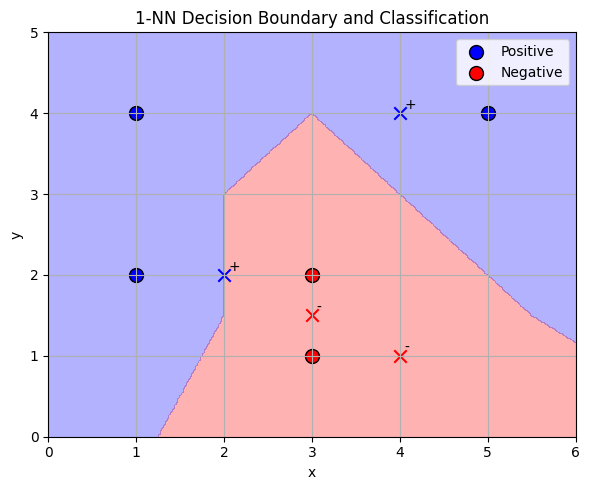

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. Define the dataset
# Positive: (1,2), (1,4), (5,4)
# Negative: (3,1), (3,2)
X = np.array([
    [1, 2],
    [1, 4],
    [5, 4],
    [3, 1],
    [3, 2]
])

y = np.array([
    1,  # (1,2) positive
    1,  # (1,4) positive
    1,  # (5,4) positive
    0,  # (3,1) negative
    0   # (3,2) negative
])

# 2. Train 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# 3. Create a grid of points to plot the decision boundary
x_min, x_max = 0, 6
y_min, y_max = 0, 5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# 4. Plot the decision boundary
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=["red", "blue"])

# 5. Plot the training points
pos = y == 1
neg = y == 0

plt.scatter(X[pos, 0], X[pos, 1], c="blue", edgecolor="k", s=100, label="Positive")
plt.scatter(X[neg, 0], X[neg, 1], c="red", edgecolor="k", s=100, label="Negative")

# 6. Classify and plot some new example points
new_points = np.array([
    [2, 2],   # near (1,2) -> likely positive
    [3, 1.5], # near negatives
    [4, 4],   # near (5,4) -> positive
    [4, 1]    # near (3,1) -> negative
])
new_labels = knn.predict(new_points)

for point, label in zip(new_points, new_labels):
    color = "blue" if label == 1 else "red"
    plt.scatter(point[0], point[1], c=color, edgecolor="k", s=80, marker="x")
    plt.text(point[0] + 0.05, point[1] + 0.05, f"{'+' if label==1 else '-'}", fontsize=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("x")
plt.ylabel("y")
plt.title("1-NN Decision Boundary and Classification")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
#Todo

it does not help conclude whether test error is higher than training error—because for the Perceptron, the training error is already known to be zero. The Perceptron algorithm only stops once it has found a separating hyperplane that correctly classifies all training points (assuming the data is linearly separable).

Therefore, there is no need to explicitly compute the training error, since by construction the perceptron has zero training misclassification error at convergence. Only the test error needs to be measured.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [3]:
# Todo
# Data
X = np.array([
    [10, -2],  # positive
    [12,  2]   # negative
])
y = np.array([+1, -1])   # labels

# Initialization
w = np.array([0.0, 0.0])
eta = 1.0

weights = [w.copy()]
updates = 0

# Run perceptron updates until convergence
while True:
    error_made = False
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            # misclassified → update
            w = w + eta * yi * xi
            updates += 1
            weights.append(w.copy())
            error_made = True
    if not error_made:
        break  # converged

print("Total updates:", updates)
print("Weight sequence:")
for i, wi in enumerate(weights):
    print(f"w{i} = {wi}")


Total updates: 9
Weight sequence:
w0 = [0. 0.]
w1 = [10. -2.]
w2 = [-2. -4.]
w3 = [ 8. -6.]
w4 = [-4. -8.]
w5 = [  6. -10.]
w6 = [ -6. -12.]
w7 = [  4. -14.]
w8 = [ -8. -16.]
w9 = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [4]:
#Todo
# Each entry: (x, y, count)
updates = [
    ((0, 0, 0, 0, 4), +1, 2),
    ((0, 0, 6, 5, 0), +1, 1),
    ((3, 0, 0, 0, 0), -1, 1),
    ((0, 9, 3, 6, 0), -1, 1),
    ((0, 1, 0, 2, 5), -1, 1),
]

# Initial weight
w = np.zeros(5, dtype=int)

# Learning rate = 1, so each update is: w += count * y * x
for x, y, count in updates:
    x = np.array(x)
    w += count * y * x

print("Final weight vector w =", w)


Final weight vector w = [ -3 -10   3  -3   3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

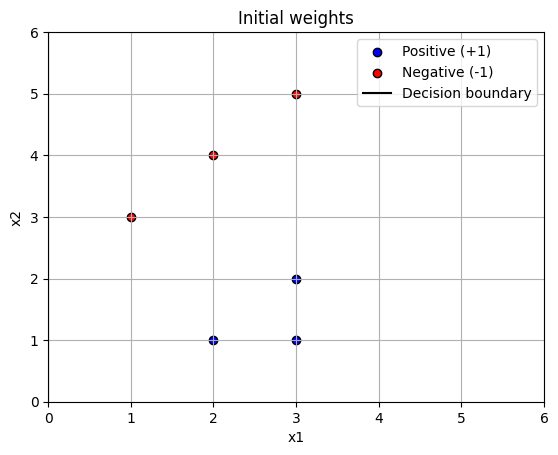

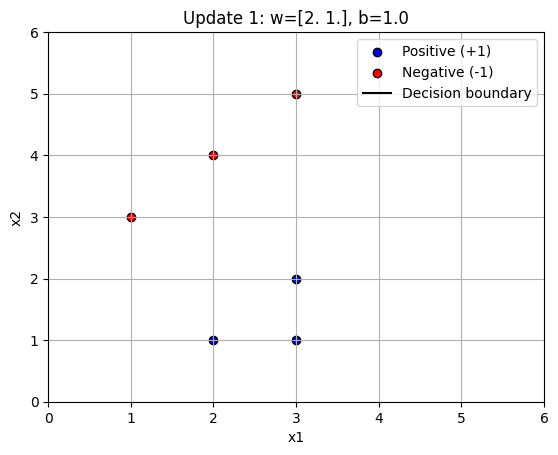

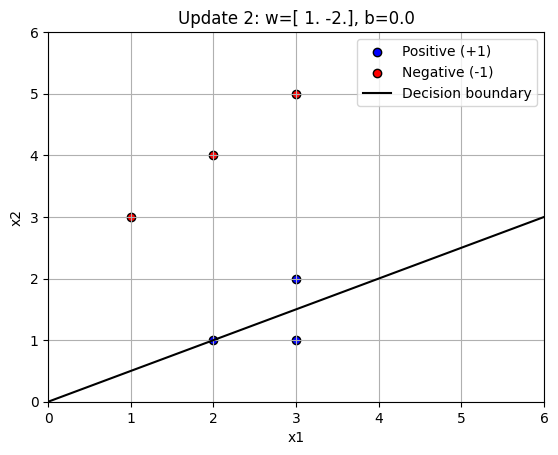

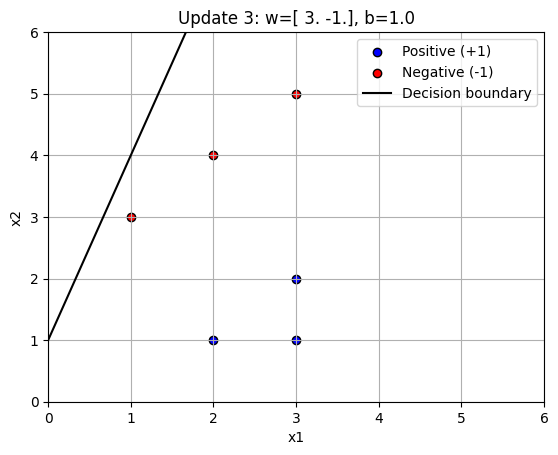

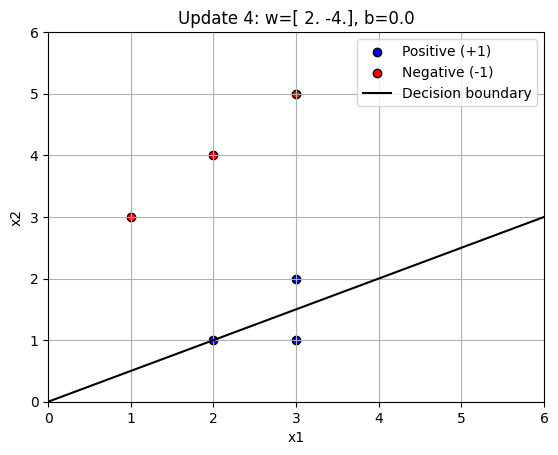

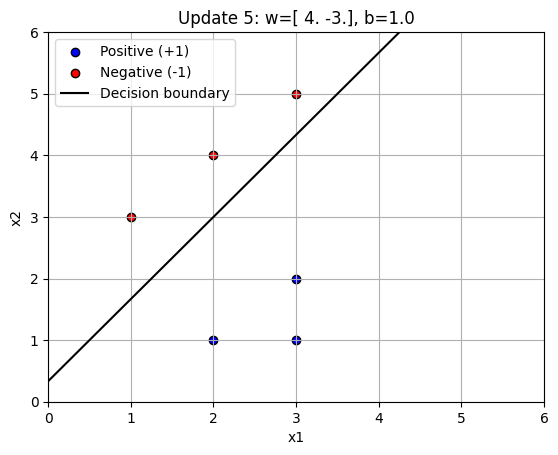

Converged after 5 updates.


In [5]:
#Todo
# ---------- 1. Toy 2D dataset ----------
# Positive (+1)
X_pos = np.array([
    [2, 1],
    [3, 1],
    [3, 2]
])

# Negative (-1)
X_neg = np.array([
    [1, 3],
    [2, 4],
    [3, 5]
])

X = np.vstack([X_pos, X_neg])
y = np.array([+1] * len(X_pos) + [-1] * len(X_neg))

# ---------- 2. Perceptron parameters ----------
w = np.zeros(2)   # weight vector (w1, w2)
b = 0.0           # bias
eta = 1.0         # learning rate
max_epochs = 20   # safety cap

# ---------- 3. Helper: plot current state ----------
def plot_decision_boundary(w, b, X, y, title=""):
    plt.clf()

    # Plot points
    X_pos = X[y == 1]
    X_neg = X[y == -1]

    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="blue", edgecolor="k", label="Positive (+1)")
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="red", edgecolor="k", label="Negative (-1)")

    # Plot decision boundary: w1 x + w2 y + b = 0  ->  y = -(w1 x + b) / w2
    x_vals = np.linspace(0, 6, 100)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, "-k", label="Decision boundary")
    else:
        # Vertical line if w2 == 0
        x_line = -b / w[0] if w[0] != 0 else 0
        plt.axvline(x=x_line, color="k", label="Decision boundary")

    plt.xlim(0, 6)
    plt.ylim(0, 6)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.pause(0.8)  # pause so you can see updates


# ---------- 4. Run Perceptron and visualize ----------
plt.ion()  # interactive mode on

plot_decision_boundary(w, b, X, y, title="Initial weights")

update_count = 0

for epoch in range(max_epochs):
    error_made = False
    for xi, yi in zip(X, y):
        # Prediction: sign(w·x + b)
        if yi * (np.dot(w, xi) + b) <= 0:
            # Misclassified -> update
            w = w + eta * yi * xi
            b = b + eta * yi
            update_count += 1
            error_made = True

            title = f"Update {update_count}: w={w}, b={b:.1f}"
            plot_decision_boundary(w, b, X, y, title=title)

    if not error_made:
        break  # converged

print(f"Converged after {update_count} updates.")
plt.ioff()
plt.show()
